In [12]:
import pandas as pd
import numpy as np

# Load the dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
import scipy.stats as st

In [14]:
file_path = r'C:\Users\RAKESH KS\Desktop\TITANIC CLASSIFIER\titanic.csv'
df = pd.read_csv(file_path)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

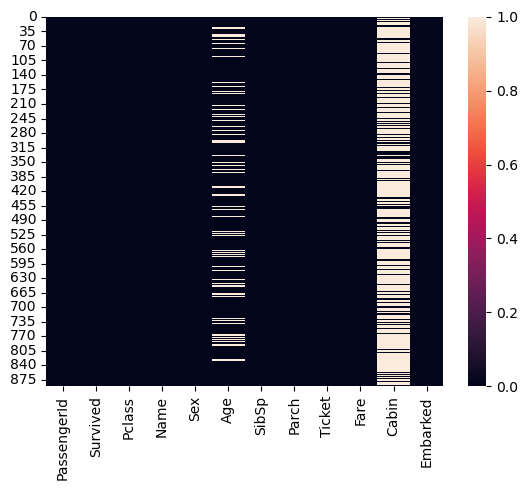

In [17]:
sns.heatmap(df.isnull());

# Now we have to handel the null value as well as outliers

In [18]:
df['Age']=df['Age'].fillna(df.Age.median())

In [19]:
df.Age.isnull().sum()

0

<Axes: ylabel='Density'>

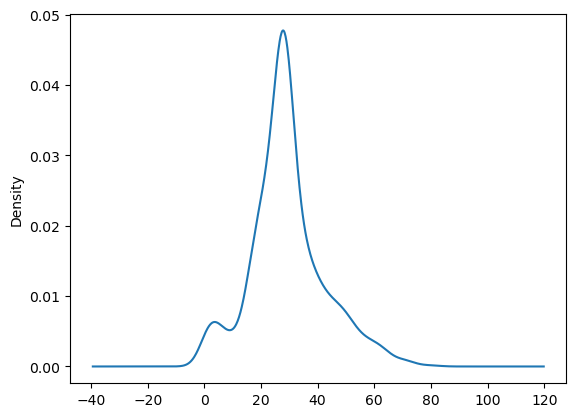

In [20]:
df.Age.plot(kind='density')

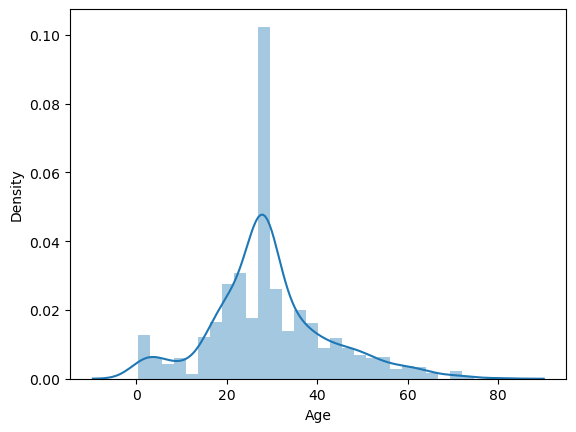

In [21]:
sns.distplot(df['Age']);

In [22]:
df.Age.skew()

0.5102446555756495

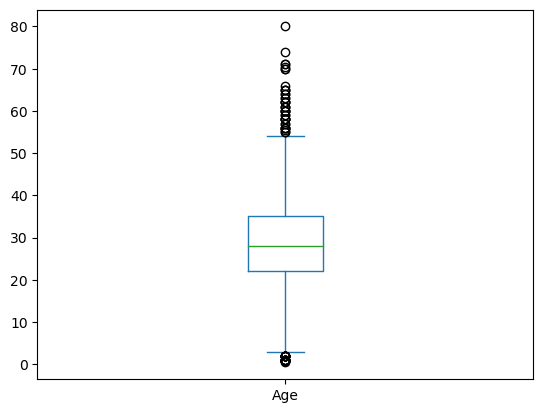

In [23]:
df.Age.plot(kind='box');

# So Age column is showing normal distribution so we can replace outlier by 3rd std method

In [24]:
ul=df.Age.mean()+(3*df.Age.std())
ll=df.Age.mean()-(3*df.Age.std())
ul,ll # age cant be negative

(68.42067214450208, -9.697507161337093)

In [25]:
df.loc[df.Age>ul,"Age"]=ul

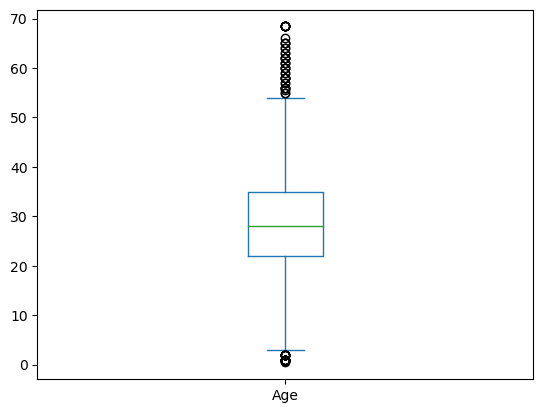

In [26]:
df.Age.plot(kind='box');

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


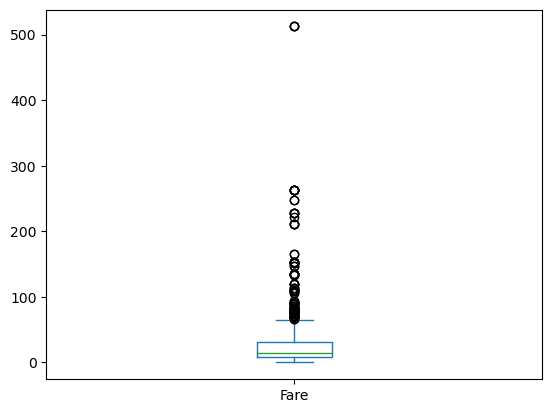

In [28]:
df.Fare.plot(kind='box');

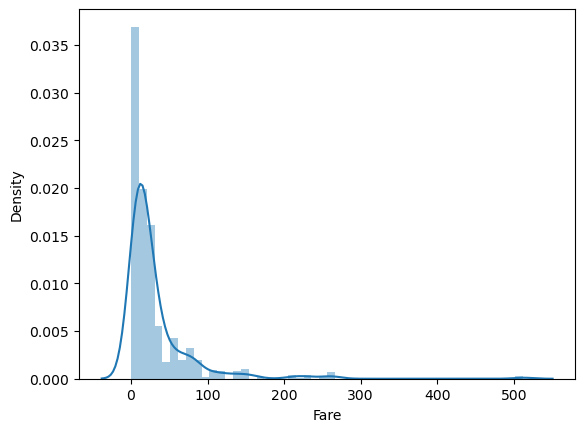

In [29]:
sns.distplot(df.Fare);

# Hence it is right skew()
we will compute null value by IQR range

extrem upper limt so we will take 3 in place of 1.5

In [31]:
IQR=df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
IQR

23.0896

In [32]:
ul=df.Fare.quantile(0.25)+(3*IQR)
ll=df.Fare.quantile(0.25)-(3*IQR)
ul,ll # ignore negative value

(77.1792, -61.358399999999996)

In [33]:
df.loc[df.Fare>ul,'Fare']=ul

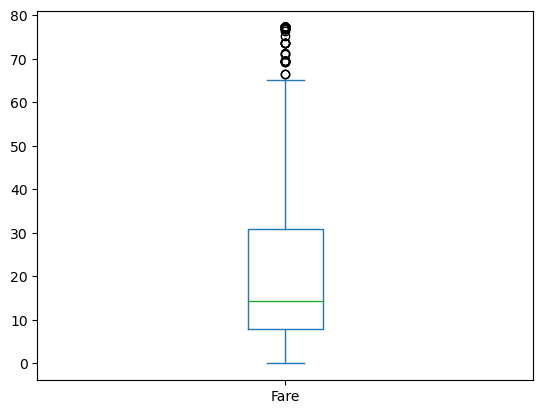

In [34]:
df.Fare.plot(kind='box');

In [35]:
# df=df.dropna(axis=1)
# df.drop(['Ticket'],axis=1)
df=df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1)

In [36]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

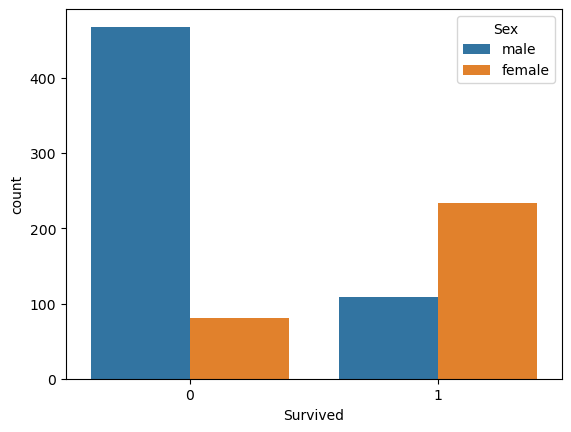

In [38]:
sns.countplot(x='Survived',data=df,hue='Sex');

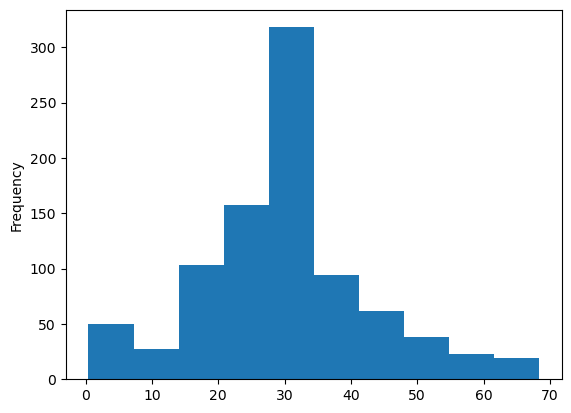

In [39]:
df.Age.plot(kind='hist');

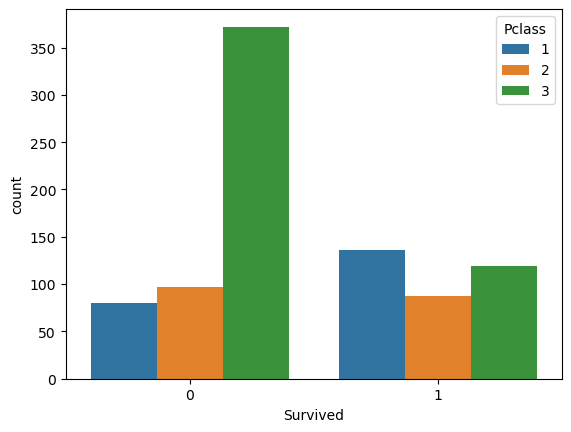

In [40]:
sns.countplot(x='Survived',data=df,hue='Pclass');

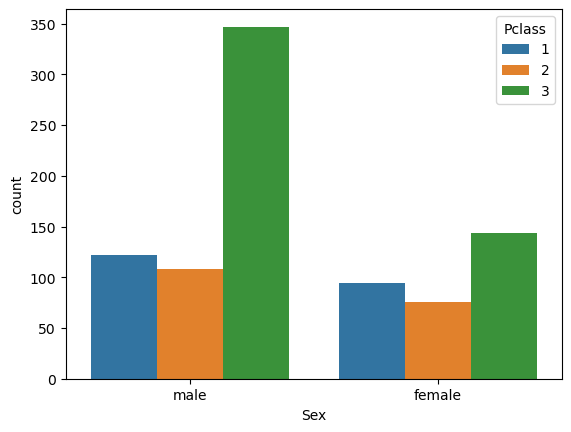

In [41]:
sns.countplot(x='Sex',data=df,hue='Pclass');

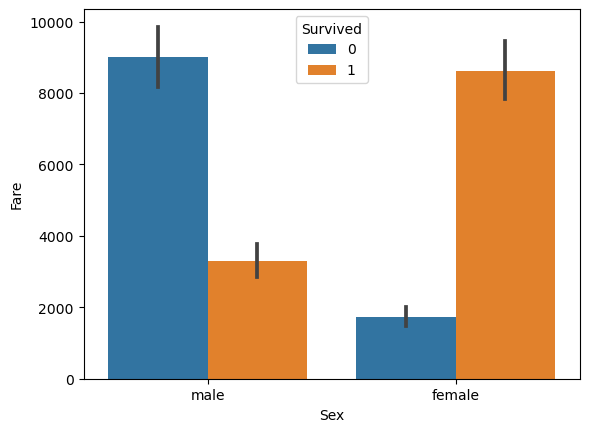

In [42]:
sns.barplot(y='Fare',x='Sex',data=df,estimator='sum',hue='Survived');

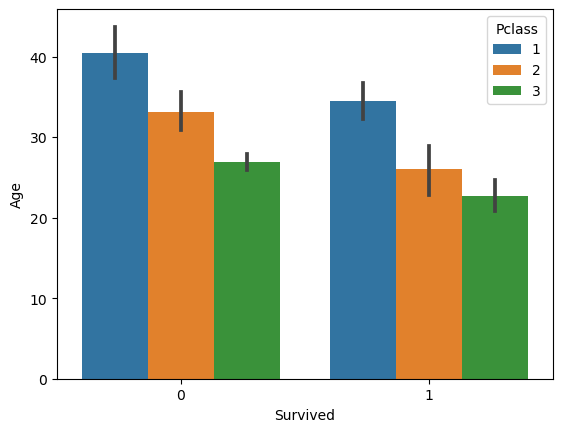

In [43]:
sns.barplot(y='Age',x='Survived',hue='Pclass',data=df);

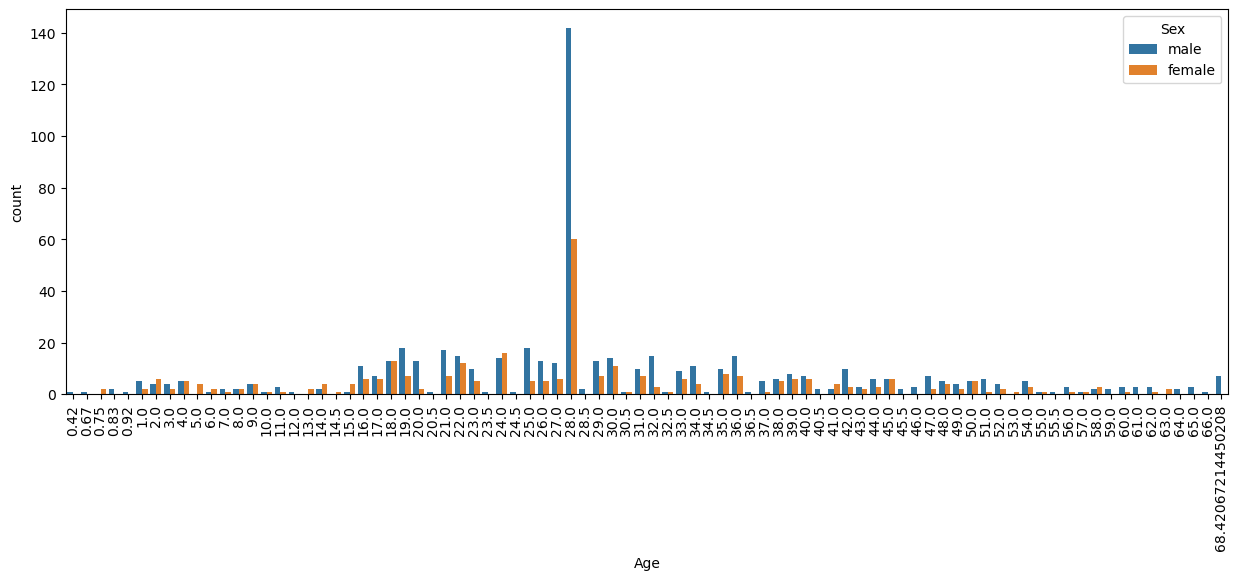

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=df,hue='Sex')
plt.xticks(rotation=90);

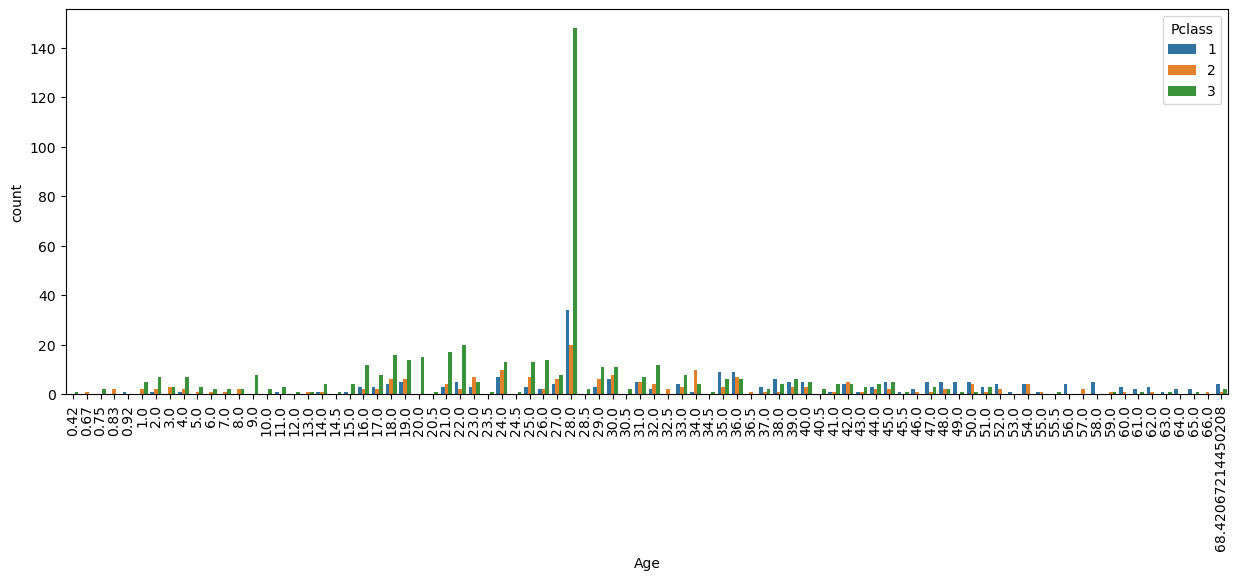

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=df,hue='Pclass')
plt.xticks(rotation=90);

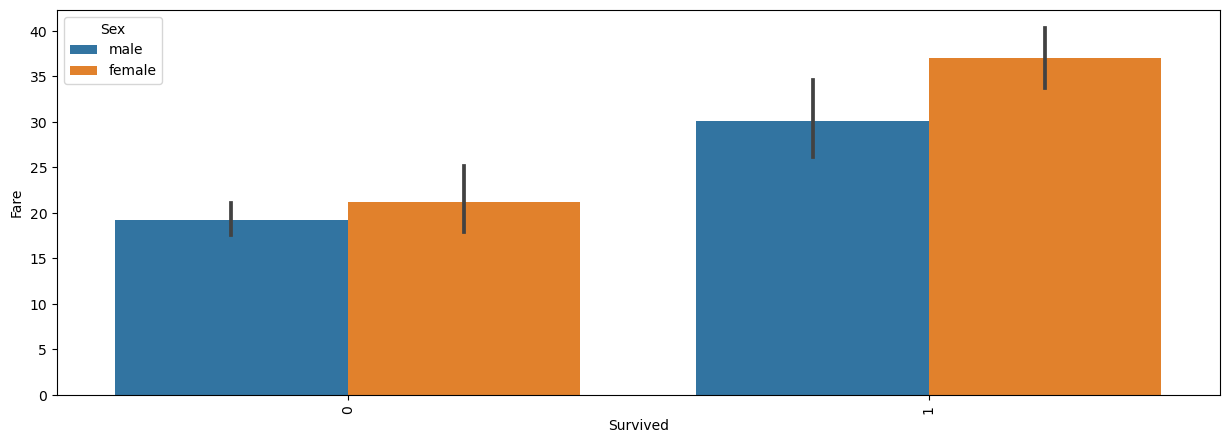

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(y='Fare',x='Survived',data=df,hue='Sex')
plt.xticks(rotation=90);

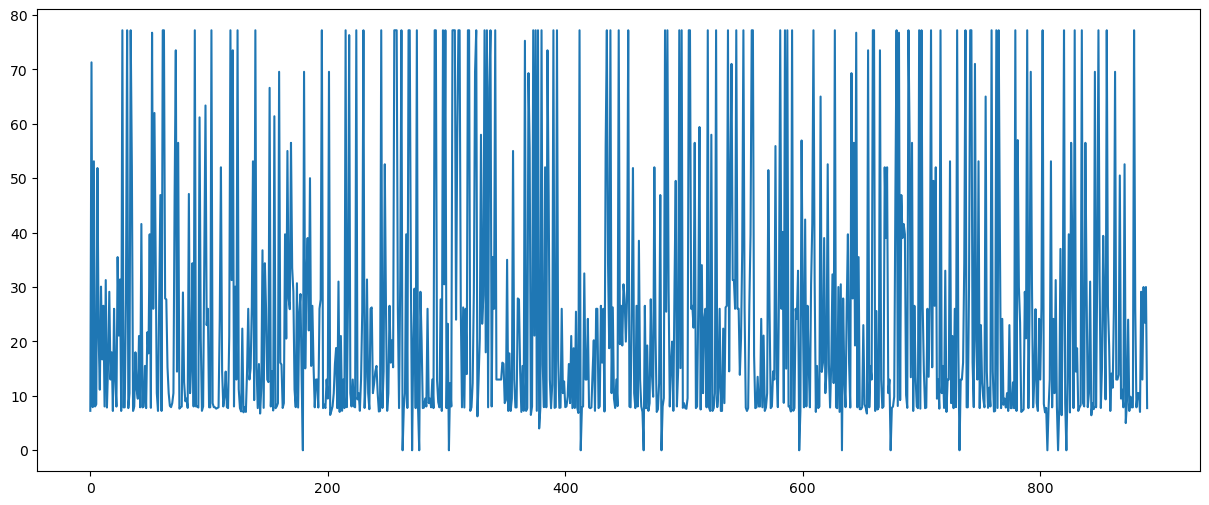

In [47]:
plt.figure(figsize=(15,6))
df.Fare.plot();

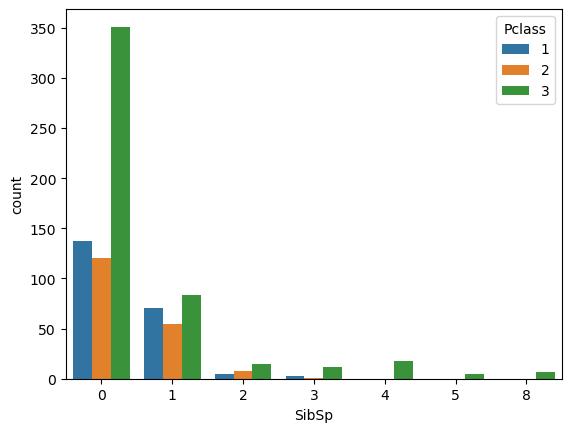

In [48]:
sns.countplot(x='SibSp',data=df,hue='Pclass');

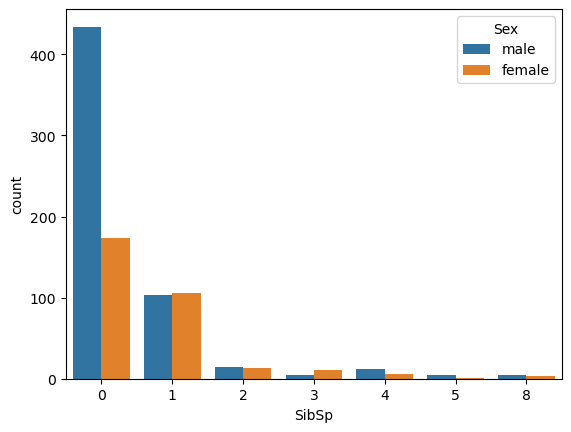

In [49]:
sns.countplot(x='SibSp',data=df,hue='Sex');

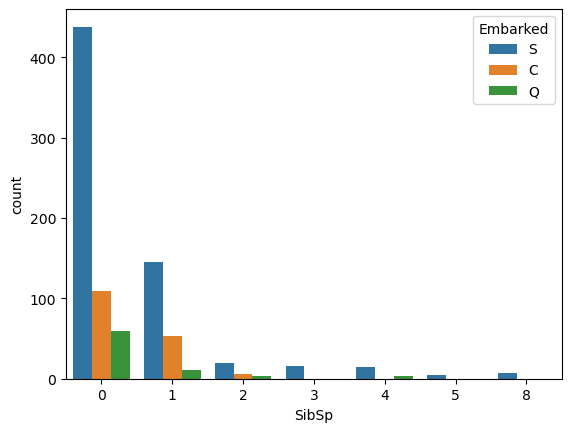

In [50]:
sns.countplot(x='SibSp',data=df,hue='Embarked');